In [1]:
import numpy as np
import rasterio
import os
import glob
import gdal
from rasterio.plot import show, show_hist

In [2]:
raster_names = glob.glob('*.tif')

arrays = []
for raster in raster_names:
    raster1 = gdal.Open(raster)
    array1 = raster1.ReadAsArray()
    print(array1)
    print(array1.shape)
    print(type(array1))
    arrays.append(array1)
print(arrays)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1765, 1121)
<class 'numpy.ndarray'>
[[-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 ...
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]]
(1765, 1121)
<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1765, 1121)
<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ...

In [3]:
raster_names = glob.glob('*.tif')

# part 1 step 1

array = []
for raster in raster_names:
    with rasterio.open(raster) as ds:
        arr = ds.read(1)
        MeanArr = np.zeros_like(arr)
        for row in range(1, arr.shape[0]-1):
            for col in range(1, arr.shape[1]-1):
                window = arr[row - 1:row + 10, col - 1:col + 8]
                array_mean = np.mean(window)
                MeanArr[row, col] = array_mean
                array.append(MeanArr)
MeanArr
print(np.mean(MeanArr))

C:\Users\catan\anaconda3\envs\geog5092\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


-inf


In [4]:
# part 2 step 2

# urban areas
array[0] = np.where(array[0] > 0, 0, 1)

# water bodies
array[1] = np.where(array[1] < 0.02, 1, 0)

# protected areas
array[2] = np.where(array[2] < 0.05, 1, 0)

# slope
array[3] = np.where(array[3] < 0, 0, 1)
array[3] = np.where(array[3] < 15, 0, 1)

# wind speed
array[4] = np.where(array[4] < 0, 0, array[4])
array[4] = np.where(array[4] > 8.5, 1, 0)

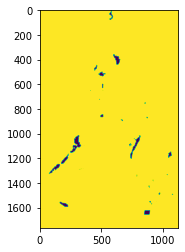

<AxesSubplot:>

In [27]:
show(array[0])

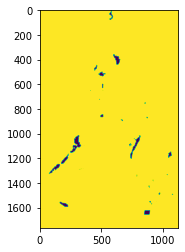

<AxesSubplot:>

In [28]:
show(array[1])

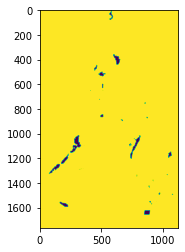

<AxesSubplot:>

In [29]:
show(array[2])

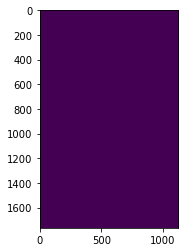

<AxesSubplot:>

In [30]:
show(array[3])

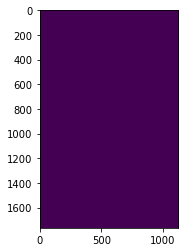

<AxesSubplot:>

In [31]:
show(array[4])

In [35]:
# part 1 step 3

sum = array[0] + array[1] + array[2] + array[3] + array[4]
suitability_test = np.where(sum == 5, 1, 0)

In [42]:
np.sum(suitability_test)

0

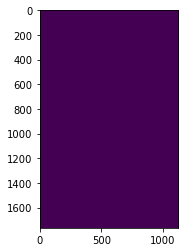

<AxesSubplot:>

In [41]:
show(suitability_test)

In [ ]:
#gdf = gpd.GeoDataFrame(suitability_test)


protected_areas.tif
slope.tif
urban_areas.tif
water_bodies.tif
ws80m.tif


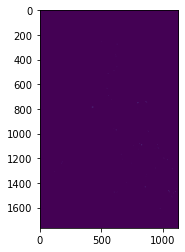

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
#with edge effect

import numpy as np
import rasterio
import os
import glob
import gdal
from rasterio.plot import show, show_hist
raster_names = glob.glob('*.tif')
array = []
for raster in raster_names:
    print(raster)
    with rasterio.open(raster) as ds:
        arr = ds.read(1)
        MeanArr = np.zeros_like(arr)
        for row in range(4, arr.shape[0]-4):
            for col in range(5, arr.shape[1]-5):
                window = arr[row - 4:row + 5, col - 5:col + 6]
                array_mean = np.mean(window)
                MeanArr[row, col] = array_mean
        array.append(MeanArr)




#water bodies
array[0] = np.where(array[0] < 0.02,1,0)

#wind
array[1] = np.where(array[1] < 0, 0, array[1])
array[1] = np.where(array[1] > 8.5,1,0)

#slope
array[2] = np.where(array[2] < 0, 0, array[2])
array[2] = np.where(array[2] < 15,1,0)


#protected
array[3] = np.where(array[3] < 0.05,1,0)

#urban
array[4] = np.where(array[4] > 0,0,1)

sum_array = array[0] + array [1] + array[2] + array[3] + array[4]
suitability_test = np.where(sum_array == 5, 1,0)

show(suitability_test)
print(suitability_test)


protected_areas.tif


C:\Users\catan\anaconda3\envs\geog5092\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\catan\anaconda3\envs\geog5092\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


slope.tif


C:\Users\catan\anaconda3\envs\geog5092\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


urban_areas.tif
water_bodies.tif
ws80m.tif


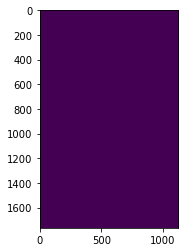

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
# no edge effect

import numpy as np
import rasterio
import os
import glob
import gdal
from rasterio.plot import show, show_hist

raster_names = glob.glob('*.tif')
array = []
for raster in raster_names:
    print(raster)
    with rasterio.open(raster) as ds:
        arr = ds.read(1)
        MeanArr = np.zeros_like(arr)
        for row in range(1, arr.shape[0]-1):
            for col in range(1, arr.shape[1]-1):
                window = arr[row - 11: row, col - 9: col]
                array_mean = np.mean(window)
                #MeanArr[row, col] = array_mean
        array.append(MeanArr)

# step 2
        
#protected
array[0] = np.where(array[0] < 0.05,1,0)

#slope
array[1] = np.where(array[1] < 0, 0, array[2])
#array[1] = np.where(array[1] == raster.nodata, np.nan, array[1])
array[1] = np.where(array[1] < 15,1,0)

#urban
array[2] = np.where(array[2] > 0,0,1)

#water bodies
array[3] = np.where(array[3] < 0.02,1,0)

#wind
array[4] = np.where(array[4] < 0, 0, array[2])
array[4] = np.where(array[4] > 8.5,1,0)

# step 3

sum_array = array[0] + array [1] + array[2] + array[3] + array[4]
suitability_test = np.where(sum_array == 5, 1,0)

show(suitability_test)
print(suitability_test)

In [73]:
window.shape

(11, 9)

In [29]:
# new try

# importing packages
import numpy as np
import rasterio
import os
import glob
from rasterio.plot import show, show_hist

# pulling files & setting up a temp array
raster_files = glob.glob('*.tif')
all_arrays = []
row_dim = 5
col_dim = 4

# step 1

for raster in raster_files:
    with rasterio.open(raster) as data:
        array = data.read(1)
        array = np.where(array < 0, 0, array)
        MeanArr = np.zeros_like(array)
        
        for row in range(5, array.shape[0] - 5):
            for col in range(4, array.shape[1] - 4):
                window = array[row - row_dim: row + row_dim + 1,
                               col - col_dim: col + col_dim + 1]
                MeanArr[row, col] = window.mean()
        all_arrays.append(MeanArr)

# step 2
        
# protected areas - less than 5%
all_arrays[0] = np.where(all_arrays[0] < 0.05, 1, 0)
# slope - avg of less than 15 degrees
all_arrays[1] = np.where(all_arrays[1] < 15, 1, 0)
# urban areas - cannot contain
all_arrays[2] = np.where(all_arrays[2] > 0, 0, 1)
# water bodies - less than 2%
all_arrays[3] = np.where(all_arrays[3] < 0.02, 1, 0)
# wind speed - avg greater than 85
all_arrays[4] = np.where(all_arrays[4] > 8.5, 1, 0)

# step 3: create a surface of suitability values by summing the five Boolean arrays

sum_array = all_arrays[0] + all_arrays[1] + all_arrays[2] + all_arrays[3] + all_arrays[4]
suitability_test = np.where(sum_array == 5, 1, 0)

# step 4: Convert your final numpy suitability array to a geotif raster file for visualization purposes.

with rasterio.open(r"C:\Users\catan\Desktop\GEOG5092\lab4\data\data\slope.tif") as dataset:
   with rasterio.open(f'suitable_sites.tif', 'w',
                 driver = 'GTiff',
                 height= sum_array.shape[0],
                 width=sum_array.shape[1],
                 count=1,
                 dtype=np.int32,
                 crs=dataset.crs,
                 transform=dataset.transform,
                 ndata =dataset.nodata
                 ) as tif_dataset:
        tif_dataset.write(sum_array,1)

# step 5: In a final print statement, report the number of locations you found with a score of five.

print('There are', suitability_test.sum(), 'suitable sites.')

There are 0 suitable sites.


In [25]:
window.shape

(11, 9)

In [7]:
# step 4: Convert your final numpy suitability array to a geotif raster file for visualization purposes.

with rasterio.open(r"C:\Users\catan\Desktop\GEOG5092\lab4\data\data\slope.tif") as dataset:
   with rasterio.open(f'suitable_sites.tif', 'w',
                 driver = 'GTiff',
                 height= sum_array.shape[0],
                 width=sum_array.shape[1],
                 count=1,
                 dtype=np.int32,
                 crs=dataset.crs,
                 transform=dataset.transform,
                 ndata =dataset.nodata
                 ) as tif_dataset:
        tif_dataset.write(sum_array,1)

In [124]:
sum_array = array[0] + array[1] + array[2] + array[3] + array[4]
a = np.reshape(sum_array, (1765, 1121))
suitability_test = np.where(sum_array == 5, 1, 0)

ValueError: cannot reshape array of size 1121 into shape (1765,1121)

In [60]:
from rasterio.plot import show, show_hist
raster_names = glob.glob('*.tif')
array = []
for raster in raster_names:
    print(raster)
    with rasterio.open(raster) as ds:
        arr = ds.read(1)
        MeanArr = np.zeros_like(arr)
        for row in range(1, arr.shape[0]-1):
            for col in range(1, arr.shape[1]-1):
                window = arr[row - 1:row + 10, col - 1:col + 8]
                array_mean = np.mean(window)
                array_mean = np.where(array_mean == raster.nodata, np.nan, array_mean)
                MeanArr[row, col] = array_mean
        array.append(MeanArr)

protected_areas.tif


AttributeError: 'str' object has no attribute 'nodata'

In [63]:
arr = np.where(arr == raster.nodata, np.nan, arr)

AttributeError: 'str' object has no attribute 'nodata'

In [30]:
# part 2

# calling station coordinates

xs = []
ys = []

with open(r"C:\Users\catan\Desktop\GEOG5092\lab4\data\data\transmission_stations.txt") as coords:
    lines = coords.readlines()[1:]
    for l in lines:
        x,y = l.split(',')
        xs.append(float(x))
        ys.append(float(y))
        stations = np.vstack([xs, ys])
        stations = stations.T

In [93]:
import rasterio
import numpy as np
import os
import glob
from scipy.spatial import cKDTree

In [94]:
# define control variables
file_dir = "C:\\Users\\catan\\Desktop\\GEOG5092\\lab4\\data\\data"
raster_files = glob.glob(file_dir + '\*.tif')

# window size 11x9
winrows = 11
wincols = 9

In [95]:
# raster prep
slope_ras = rasterio.open(os.path.join(file_dir, 'slope.tif'))
wind_ras = rasterio.open(os.path.join(file_dir, 'ws80m.tif'))
urban_ras = rasterio.open(os.path.join(file_dir, 'urban_areas.tif'))
water_ras = rasterio.open(os.path.join(file_dir, 'water_bodies.tif'))
protected_ras = rasterio.open(os.path.join(file_dir, 'protected_areas.tif'))

slope_arr = slope_ras.read(1)
wind_arr = wind_ras.read(1)
urban_arr = urban_ras.read(1)
water_arr = water_ras.read(1)
protected_arr = protected_ras.read(1)

#accounting for zeros
wind_arr = np.where(wind_arr < 0, 0, wind_arr)
slope_arr = np.where(slope_arr < 0, 0, slope_arr)

metadata = wind_ras.meta

In [96]:
window = np.ones((winrows, wincols))

In [97]:
# moving window function

def mean_array(temp_arr, window):
    pct_arr = np.zeros(temp_arr.shape)
    window_area = float(window.sum())
    
    rowdim = window.shape[0]//2
    coldim = window.shape[1]//2
    
    for row in range(rowdim,temp_arr.shape[0] - rowdim):
        for col in range(coldim,temp_arr.shape[1] - coldim):
            window = temp_arr[row - rowdim: row + rowdim + 1,
                              col - coldim: col + coldim + 1]
            pct_arr[row,col] = window.sum()
    return pct_arr / window_area

In [98]:
# slope
slope_sites = mean_array(slope_arr, window)
slope_sites = np.where(slope_sites > 15, 0, 1)
slope_sites.sum()

1921159

In [99]:
# wind
wind_sites = mean_array(wind_arr, window)
wind_sites = np.where(wind_sites > 8.5, 1, 0)
wind_sites.sum()

2711

In [100]:
# urban sites
urban_sites = mean_array(urban_arr, window)
urban_sites = np.where(urban_sites != 1, 1, 0)
urban_sites.sum()

1978565

In [101]:
# water bodies
water_sites = mean_array(water_arr, window)
water_sites = np.where(water_sites < 0.02, 1, 0)
water_sites.sum()

1961057

In [102]:
# protected areas
protected_sites = mean_array(protected_arr, window)
protected_sites = np.where(protected_sites < 0.05, 1, 0)
protected_sites.sum()

1889327

In [103]:
sum_array = slope_sites + wind_sites + urban_sites + water_sites + protected_sites
suitability_test = np.where(sum_array == 5, 1, 0)

In [105]:
# step 4: Convert your final numpy suitability array to a geotif raster file for visualization purposes.

with rasterio.open(r"C:\Users\catan\Desktop\GEOG5092\lab4\data\data\slope.tif") as dataset:
   with rasterio.open(f'suitable_sites.tif', 'w',
                 driver = 'GTiff',
                 height= sum_array.shape[0],
                 width=sum_array.shape[1],
                 count=1,
                 dtype=np.int32,
                 crs=dataset.crs,
                 transform=dataset.transform,
                 ndata =dataset.nodata
                 ) as tif_dataset:
        tif_dataset.write(sum_array,1)

In [104]:
print('There are', suitability_test.sum(), 'suitable sites.')

There are 627 suitable sites.


In [108]:
ss = rasterio.open('suitable_sites.tif')

In [113]:
os.path.abspath(ss)

TypeError: _getfullpathname: path should be string, bytes or os.PathLike, not DatasetReader